### Practical Exercise on Linear Regression

We perform a linear regression on a dataset to predict price of used cars based on certain features 
like year, engine, etc

In [1]:
#import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

sns.set()

In [2]:
#view dataset
data = pd.read_csv('car_sets.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data['Model'].value_counts()

Model
E-Class    199
A6         172
Vito       171
Kangoo     146
Camry      134
          ... 
5            1
S5           1
21           1
Vista        1
Scion        1
Name: count, Length: 312, dtype: int64

#### Feature(Model) has over 300 values, so it is impractical to use it for predictions 

In [5]:
#Drop "Model"
data_1 = data.drop(['Model'], axis=1)
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [6]:
#verify shape to ensure "Model" dropped
data_1.shape

(4345, 8)

## Since there are over 4000 values and we have just a few null values in the "Engine" column, we drop null values

In [7]:
data_1.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
#drop null values for column "EngineV"
data_2 = data_1.dropna(subset = ["EngineV"])
data_2.isna().sum()

Brand             0
Price           170
Body              0
Mileage           0
EngineV           0
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
data_2 = pd.get_dummies(data_2, drop_first=True, dtype=int)
data_2.head()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Fill Null values with KNN Imputer

In [10]:
from sklearn.impute import KNNImputer


# print("Before Imputation:\n", data_1)

# Step 1: Initialize KNN Imputer (choose k)
imputer = KNNImputer(n_neighbors=5)  # Uses the 5 closest neighbors

# Step 2: Fit and Transform the Data
imputed_data = imputer.fit_transform(data_2)

# Step 3: Convert back to DataFrame
data_imputed = pd.DataFrame(imputed_data, columns=data_2.columns)

print("\nAfter Imputation:\n")
data_imputed.head()




After Imputation:



,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277.0,2.0,1991.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,7900.0,427.0,2.9,1999.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,13300.0,358.0,5.0,2003.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,23000.0,240.0,4.2,2007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,18300.0,120.0,2.0,2011.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [11]:
data_2.shape

(4195, 19)

In [12]:
#checking for values in price less than 30%
percent = 0.3
tres = data_imputed['Price'].max() * percent     #the code "data_2['Price'].max() * 0.3" checks for the 30th percent of the highest value
# data_2[data_2['Price'] < tres].count()     #then here values less than 30% is filtered

thrt = data_imputed['Price'] < tres
thrt.sum()

4054

#### Majority of the instances have their price to be less than 30%, therefore the data distribution is skewed towards the low price

<Axes: xlabel='Price', ylabel='Density'>

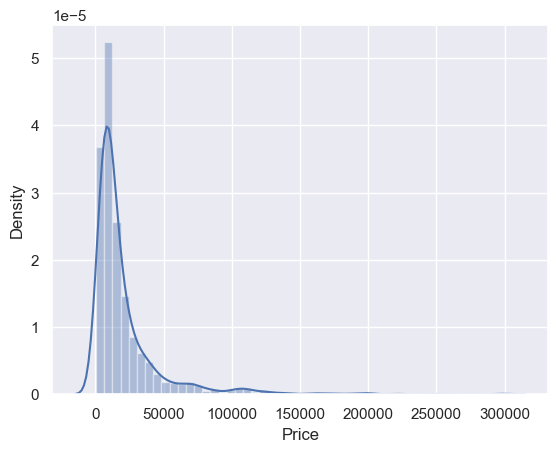

In [13]:
#plot a graph to visualize this data distribution
import warnings
warnings.filterwarnings("ignore", category = Warning)
sns.distplot(data_imputed['Price'])

This shows that there are outlier in the variable.

#An outlier is a value that is so far removed from the mean#

## Handling Outliers

In [14]:
q = data_imputed['Price'].quantile(0.96)
data_3 = data_imputed[data_imputed['Price'] < q]
data_3.describe()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,16467.035272,167.035759,2.749585,2006.204619,0.159672,0.193444,0.077229,0.113732,0.125652,0.225230,0.068041,0.097840,0.383164,0.096846,0.161162,0.148249,0.026571,0.359573,0.906879
std,15027.738779,101.636328,5.162619,6.619594,0.366347,0.395047,0.266987,0.317525,0.331498,0.417785,0.251847,0.297135,0.486218,0.295785,0.367726,0.355391,0.160845,0.479935,0.290639
min,600.000000,0.000000,0.600000,1969.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6950.000000,95.500000,1.800000,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,11300.000000,160.000000,2.200000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,20705.625000,230.000000,3.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,80999.000000,980.000000,99.990000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Price', ylabel='Density'>

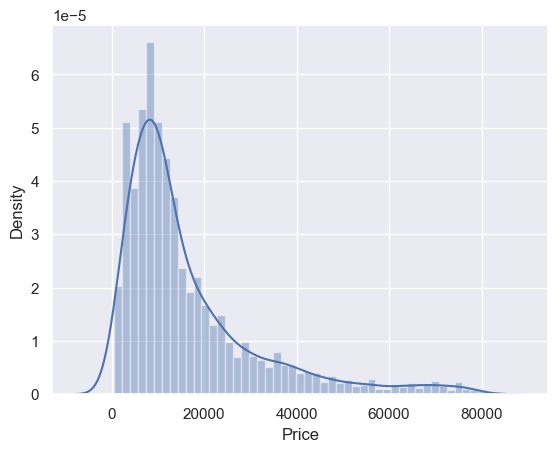

In [15]:
sns.distplot(data_3['Price'])

<Axes: xlabel='Mileage', ylabel='Density'>

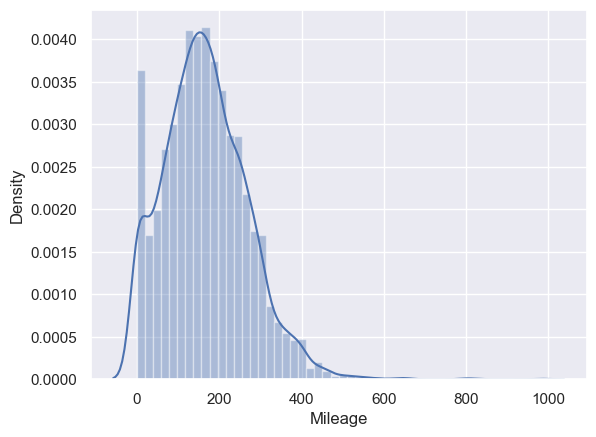

In [16]:
sns.distplot(data_3['Mileage'])

<Axes: xlabel='Mileage', ylabel='Density'>

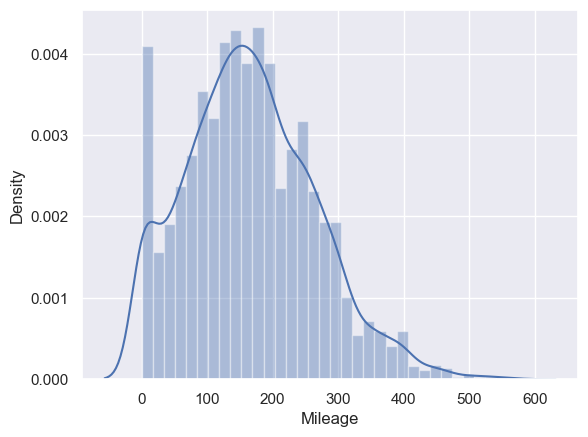

In [17]:
# q = data_3['Mileage'].quantile(0.995)
data_4 = data_3[data_3['Mileage'] < 580]
sns.distplot(data_4['Mileage'])

In [18]:
data_4.describe()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000
mean,16453.147025,166.057960,2.749672,2006.204726,0.159950,0.192786,0.077363,0.113930,0.125622,0.225124,0.067910,0.097264,0.383831,0.097015,0.161194,0.148259,0.026617,0.360199,0.906716
std,15007.525017,98.833915,5.166974,6.621057,0.366606,0.394536,0.267200,0.317766,0.331464,0.417716,0.251623,0.296353,0.486378,0.296015,0.367756,0.355400,0.160981,0.480118,0.290866
min,600.000000,0.000000,0.600000,1969.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6950.000000,95.000000,1.800000,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,11300.000000,160.000000,2.200000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,20702.812500,230.000000,3.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,80999.000000,575.000000,99.990000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='EngineV', ylabel='Density'>

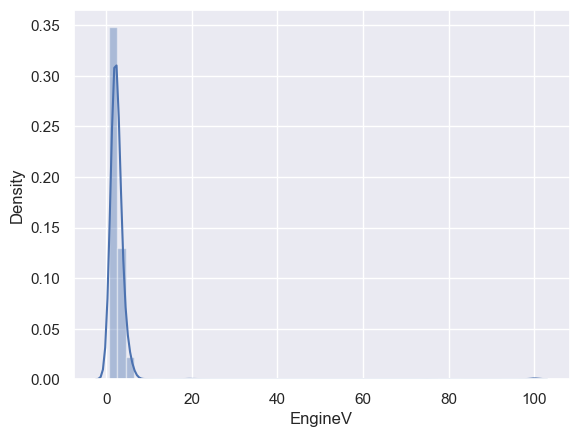

In [19]:
sns.distplot(data_4['EngineV'])

<Axes: xlabel='EngineV', ylabel='Density'>

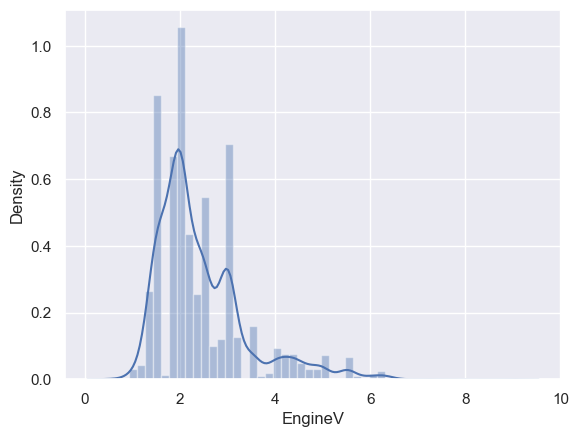

In [20]:
data_5 = data_4[data_4['EngineV'] < 10]
sns.distplot(data_5['EngineV'])

<Axes: xlabel='Year', ylabel='Density'>

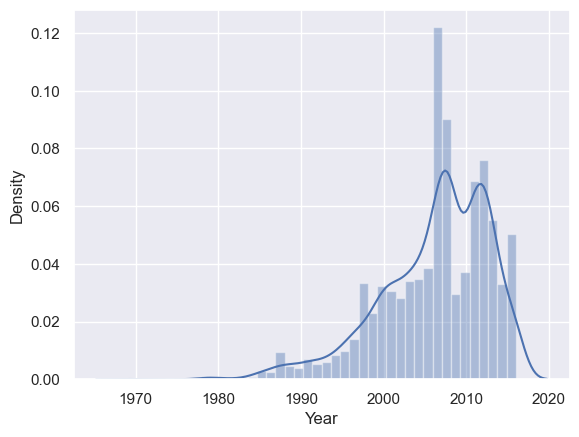

In [21]:
sns.distplot(data_5['Year'])

<Axes: xlabel='Year', ylabel='Density'>

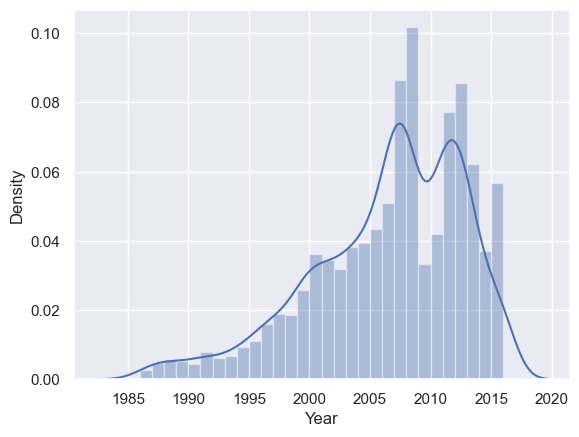

In [22]:
# q = data_5['Year'].quantile(0.01)
data_6 = data_5[data_5['Year'] > 1985]
sns.distplot(data_6['Year'])

In [23]:
data_6.describe()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000
mean,16590.100929,165.560312,2.433533,2006.388819,0.159909,0.191388,0.078066,0.113322,0.126417,0.225132,0.067237,0.097457,0.381768,0.097960,0.161168,0.148074,0.025938,0.359104,0.906824
std,15034.068696,98.516851,0.948154,6.325425,0.366568,0.393443,0.268309,0.317025,0.332360,0.417722,0.250464,0.296616,0.485881,0.297298,0.367733,0.355218,0.158971,0.479798,0.290715
min,800.000000,0.000000,0.600000,1986.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7000.000000,95.000000,1.800000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,11500.000000,160.000000,2.200000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,20900.000000,230.000000,3.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,80999.000000,575.000000,9.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
data_cleaned = data_6.reset_index(drop=True)


In [25]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000
mean,16590.100929,165.560312,2.433533,2006.388819,0.159909,0.191388,0.078066,0.113322,0.126417,0.225132,0.067237,0.097457,0.381768,0.097960,0.161168,0.148074,0.025938,0.359104,0.906824
std,15034.068696,98.516851,0.948154,6.325425,0.366568,0.393443,0.268309,0.317025,0.332360,0.417722,0.250464,0.296616,0.485881,0.297298,0.367733,0.355218,0.158971,0.479798,0.290715
min,800.000000,0.000000,0.600000,1986.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7000.000000,95.000000,1.800000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,11500.000000,160.000000,2.200000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,20900.000000,230.000000,3.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,80999.000000,575.000000,9.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


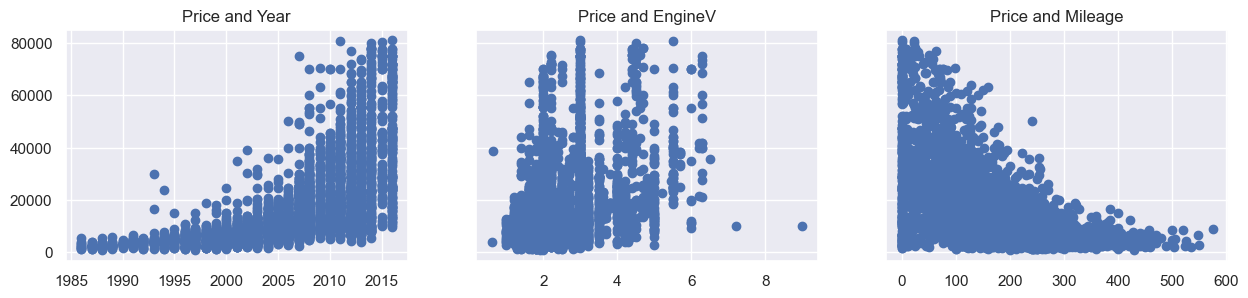

In [26]:
#Checking the OLS Assumptions
#Linearity

f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [27]:
#Perform log transformation of the Price Variable to satisfy linearity

log_price = np.log10(data_cleaned['Price'])
data_cleaned['Log Price'] = log_price
data_cleaned.head()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Log Price
0,4200.0,277.0,2.0,1991.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3.623249
1,7900.0,427.0,2.9,1999.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.897627
2,13300.0,358.0,5.0,2003.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.123852
3,23000.0,240.0,4.2,2007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.361728
4,18300.0,120.0,2.0,2011.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.262451


#### plot Graph to check for linearity

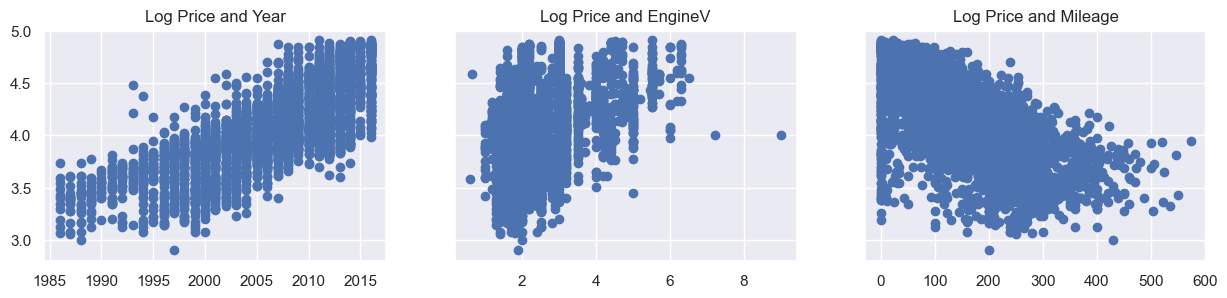

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Log Price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Log Price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Log Price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [29]:
# data_cleaned = data_cleaned.drop(['Price'], axis=1)


In [30]:
data_cleaned.head()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Log Price
0,4200.0,277.0,2.0,1991.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3.623249
1,7900.0,427.0,2.9,1999.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.897627
2,13300.0,358.0,5.0,2003.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.123852
3,23000.0,240.0,4.2,2007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.361728
4,18300.0,120.0,2.0,2011.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.262451


In [31]:
#Check for multicolilearity

data_cleaned.columns.values

array(['Price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Log Price'], dtype=object)

In [32]:
## We will use variance inflation factor from statsmodel to check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Note this test is done on data with categorical values
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]

vif = pd.DataFrame()                #Here we create an empty dataframe 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])] #the
#then here 👆 we use the VIF feature to measure the values in the varible, iterating with for loop
vif["Features"] = variables.columns  #here we attach the varible columns to the dataframe


In [33]:
vif

,VIF,Features
0,3.798722,Mileage
1,10.189772,Year
2,7.589907,EngineV


#### Haven checked the VIF for the values, we drop the year varible since the vif is too high. 
#### Note: only a vif of 5 or less is acceptable. 
however we will accept the varible year since we only have a  few varibles and its VIF is not so far from 5

In [35]:
data_cleaned.head(5)

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Log Price
0,4200.0,277.0,2.0,1991.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3.623249
1,7900.0,427.0,2.9,1999.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.897627
2,13300.0,358.0,5.0,2003.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.123852
3,23000.0,240.0,4.2,2007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.361728
4,18300.0,120.0,2.0,2011.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.262451


#### Time to handle the categorical values

We use a special Pandas function called get_dummies to convert all categorical values
into their dummies.

In [37]:
data_cleaned.columns.values

array(['Price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Log Price'], dtype=object)

### we rearrange the order of the columns

In [38]:
data_cleaned_new = data_cleaned[['Price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Log Price']]

## Build our linear regression

In [39]:
#declare the input and the target

target = data_cleaned_new['Log Price']
inputs = data_cleaned_new.drop(['Log Price', 'Price'], axis=1)

In [40]:
target.head()

0    3.623249
1    3.897627
2    4.123852
3    4.361728
4    4.262451
Name: Log Price, dtype: float64

In [41]:
inputs.head()

,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.0,2.0,1991.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,427.0,2.9,1999.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,358.0,5.0,2003.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,240.0,4.2,2007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,120.0,2.0,2011.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [42]:
#scale the inputs 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(inputs)

StandardScaler()

In [43]:
inputs_scaled = scaler.transform(inputs)

In [44]:
inputs_scaled,target

(array([[ 1.13131633, -0.45729666, -2.43315786, ..., -0.16318318,
          1.33593132,  0.32054522],
        [ 2.65409025,  0.49203565, -1.16826138, ..., -0.16318318,
         -0.74854148,  0.32054522],
        [ 1.95361425,  2.70714435, -0.53581314, ..., -0.16318318,
         -0.74854148,  0.32054522],
        ...,
        [-1.32542559, -0.87922212,  1.20341951, ..., -0.16318318,
          1.33593132,  0.32054522],
        [-1.67058768,  1.12492385, -1.16826138, ..., -0.16318318,
          1.33593132,  0.32054522],
        [-0.42191306, -0.45729666,  1.04530745, ..., -0.16318318,
         -0.74854148,  0.32054522]]),
 0       3.623249
 1       3.897627
 2       4.123852
 3       4.361728
 4       4.262451
           ...   
 3966    3.832509
 3967    4.060698
 3968    4.252853
 3969    3.812913
 3970    4.130334
 Name: Log Price, Length: 3971, dtype: float64)

## Split data into Train and Test

In [45]:
#Train Test Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.3, random_state=45)

In [46]:
x_train

array([[-0.10720645, -0.98470349, -0.21958902, ..., -0.16318318,
         1.33593132,  0.32054522],
       [-0.9802635 ,  0.59751701,  1.20341951, ..., -0.16318318,
        -0.74854148,  0.32054522],
       [-0.17826924, -0.24633392,  0.57097128, ..., -0.16318318,
        -0.74854148,  0.32054522],
       ...,
       [ 1.43587112,  0.38655428, -2.43315786, ..., -0.16318318,
        -0.74854148,  0.32054522],
       [-0.03614367, -0.87922212, -1.80070962, ..., -0.16318318,
         1.33593132, -3.11968467],
       [-1.2137555 , -0.87922212,  0.88719539, ..., -0.16318318,
         1.33593132,  0.32054522]])

## Fit the model

In [47]:
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

## Check Model R-square i.e Efficiency of model

In [48]:
regression.score(x_train, y_train)

0.8884889534087383

## Test model on Test (i.e test model on unseen data)

In [49]:
regression.score(x_test, y_test)

0.8755015147941747

In [50]:
y_predicted = regression.predict(x_train)

## #compare true values and predicted values using scatter plot to see how well they fit


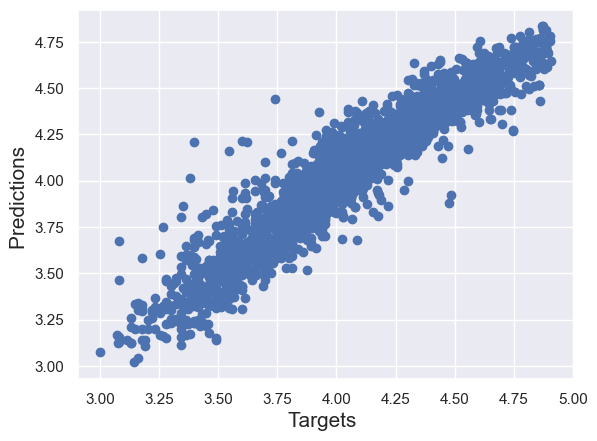

In [51]:
plt.scatter(y_train, y_predicted)
plt.xlabel('Targets ', size=15)
plt.ylabel('Predictions ', size=15)



plt.show()

In [52]:
regression.intercept_

4.06681484531043

In [53]:
regression.coef_

array([-0.04206525,  0.08842269,  0.22087232,  0.01385118, -0.00235023,
       -0.05508852, -0.08541652, -0.0273866 , -0.04318817, -0.04023641,
       -0.03235203, -0.06021603, -0.04321549, -0.0659376 , -0.01796628,
       -0.0085062 , -0.02355677,  0.11037403])

<Axes: xlabel='Log Price', ylabel='Density'>

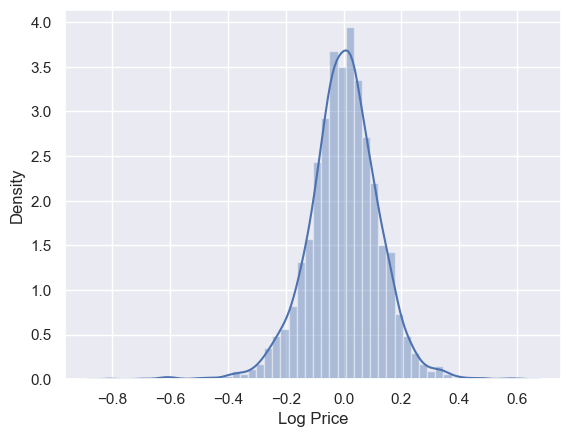

In [54]:
#Residual plot

sns.distplot(y_train - y_predicted)

In [55]:
# TEsting of our model

y_test_predicted = regression.predict(x_test)

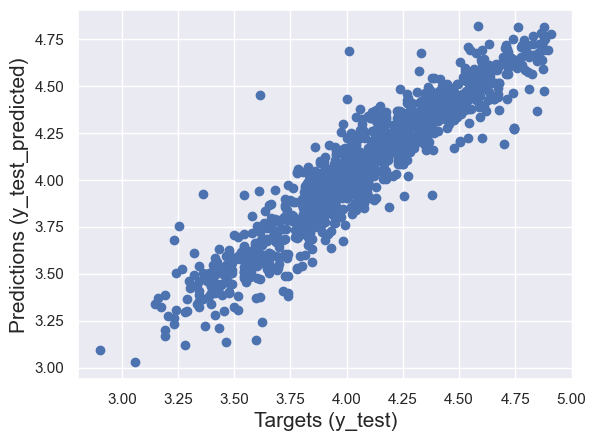

In [56]:
plt.scatter(y_test, y_test_predicted)
plt.xlabel('Targets (y_test)', size=15)
plt.ylabel('Predictions (y_test_predicted)', size=15)



plt.show()

## convert log values "Price" to actual values


In [57]:
performance_df = pd.DataFrame(np.exp(y_test_predicted), columns=["Prediction"])
performance_df.head()

,Prediction
0,53.888706
1,29.630408
2,30.251944
3,112.131314
4,67.134861


In [58]:
y_test = y_test.reset_index(drop=True)

In [59]:
performance_df["Targets"] = np.exp(y_test)
performance_df.head()

,Prediction,Targets
0,53.888706,46.471959
1,29.630408,24.296485
2,30.251944,41.099804
3,112.131314,125.068252
4,67.134861,74.571162


## Compare the actual values to predicted values and output the residuals(i.e the error in calculation)

In [60]:
performance_df["Residual"] = performance_df["Prediction"] - performance_df["Targets"]
performance_df.head(20)

,Prediction,Targets,Residual
0,53.888706,46.471959,7.416747
1,29.630408,24.296485,5.333923
2,30.251944,41.099804,-10.847859
3,112.131314,125.068252,-12.936938
4,67.134861,74.571162,-7.436301
5,96.034419,124.299131,-28.264713
6,59.815967,53.395347,6.420620
7,63.047583,67.862523,-4.814940
8,50.427848,53.395347,-2.967499
9,41.971339,44.050197,-2.078858
